# WIN Prediction Analytics

Aim of this project is to analyze and predict the win possibilities of deals/projects for an IT consulting company and see how the possibility of winning a deal is impacted by other variables. This will enable the IT consulting company to manage the effort required to win a deal to meet the growth targets. 

Data file contains data related to the projects/deals won or lost. This data contains the project category, price and sector from 2011 to 2018

Objective 1: Predictive Analytics - Build a ML model to predict the probability of win/loss for bidding activities for a potential client. 
Objective 2: Prescriptive Analytics – Identify variable/s that are most likely to help in converting an opportunity into a win. 

Based on the data available build a model to predict the bidding outcome. This will help your organization decide whether the bid manager and his team should invest their effort working for the win. Also note that in this data there are multiple bid managers working with a SBU Head and vice versa. Based on the data you also need to identify the SBU HeadBid Manager pair which will have the highest winning probability for the bid.

So first of all starting with loading the libraries and setting the directory

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#pd.pandas.set_option('display.max_columns', None)

In [2]:
import os
os.getcwd()

'D:\\faizan\\DSP\\Python\\Capstone Project'

In [3]:
path = "D:\\faizan\DSP\Python\Capstone Project"
os.chdir(path)
os.getcwd()

'D:\\faizan\\DSP\\Python\\Capstone Project'

After setting the path, let's start with loading our datafile.

In [4]:
dataset = pd.read_excel("Win_Prediction_Data-Copy.xlsx")
dataset.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


We can see that there are lots of categorical variables and our aim to find out the prediction for, 'Deal Status Code' i.e. it is our target variable. Further knowing data more:-

In [5]:
dataset.shape

(10061, 9)

So our Data has 10061 rows and 9 features out of which 8 are independent variable and 1 is dependent variable.

Now getting more information of our data,

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


Here we find that out of 8 independent variables 7 are categorical and 1 is float data type.

Further finding out number of duplicate rows and viewing them,

In [7]:
dataset.duplicated().sum()

14

In [8]:
dataset.loc[dataset.duplicated(keep=False), : ]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
3007,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3333,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3879,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
5030,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
7620,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost


Removing these duplicate rows,

In [9]:
dataset.drop_duplicates(keep='first').shape

(10047, 9)

Now by considering our problem statement we can analyse that our features-Client Category, VP Name, Manager Name, Deal Cost are more significant for Deal Status Code.

Therefore dropping the remaining features.

In [10]:
dataset.drop(['Solution Type', 'Deal Date', 'Sector', 'Location'], axis=1, inplace=True)

In [11]:
dataset.head()

,Client Category,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Ekta Zutshi,Russell Dahlen,80882.35,Lost


Now checking for null values if any,

In [12]:
dataset.isnull().sum()

Client Category     79
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

Here we find that there are null values in Client Category. So as the Client Category if object or categorical variable replacing the missing value by most frequent value.

In [13]:
dataset['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

Here we find that 'Others' is most frequent in Client Category, therefore replacing the missing values with it.

In [14]:
dataset['Client Category'] = dataset['Client Category'].fillna('Others')

In [15]:
dataset.isnull().sum()

Client Category     0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

As it is a classification problem outliers will not a problem for us. Also we need to conver the categorical variables into the numeric form in order to process our data.

Now going to the visualization part,
We will try to analyse 'Deal Status Code'

<AxesSubplot:xlabel='Deal Status Code', ylabel='count'>

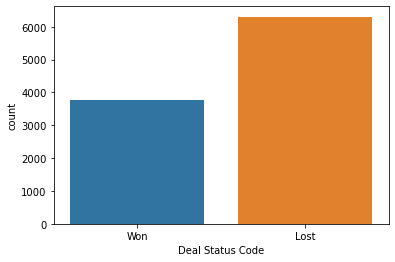

In [16]:
sns.countplot(dataset['Deal Status Code'])

From this we found that number of Lost bids are more than the number of Won bids

Now in order to analyse further lets encode our categorical variables.

Starting with 'Deal Status Code' and using Label Encoder from sklearn to encode.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Deal Status Code'] = le.fit_transform(dataset['Deal Status Code'])
dataset.head()

,Client Category,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Ekta Zutshi,Gopa Trilochana,150000.00,1
1,Telecom,Ekta Zutshi,Gopa Trilochana,744705.88,1
2,Internal,Ekta Zutshi,Russell Dahlen,60000.00,0
3,Internal,Ekta Zutshi,Russell Dahlen,60000.00,0
4,Internal,Ekta Zutshi,Russell Dahlen,80882.35,0


As we can see the 'Won' is encoded as '1' and 'Lost' is encoded as '0'.

Now we will try to find out the relationship between 'VP Name' and 'Deal Status Code' using seaborn library.

<AxesSubplot:xlabel='Deal Status Code', ylabel='VP Name'>

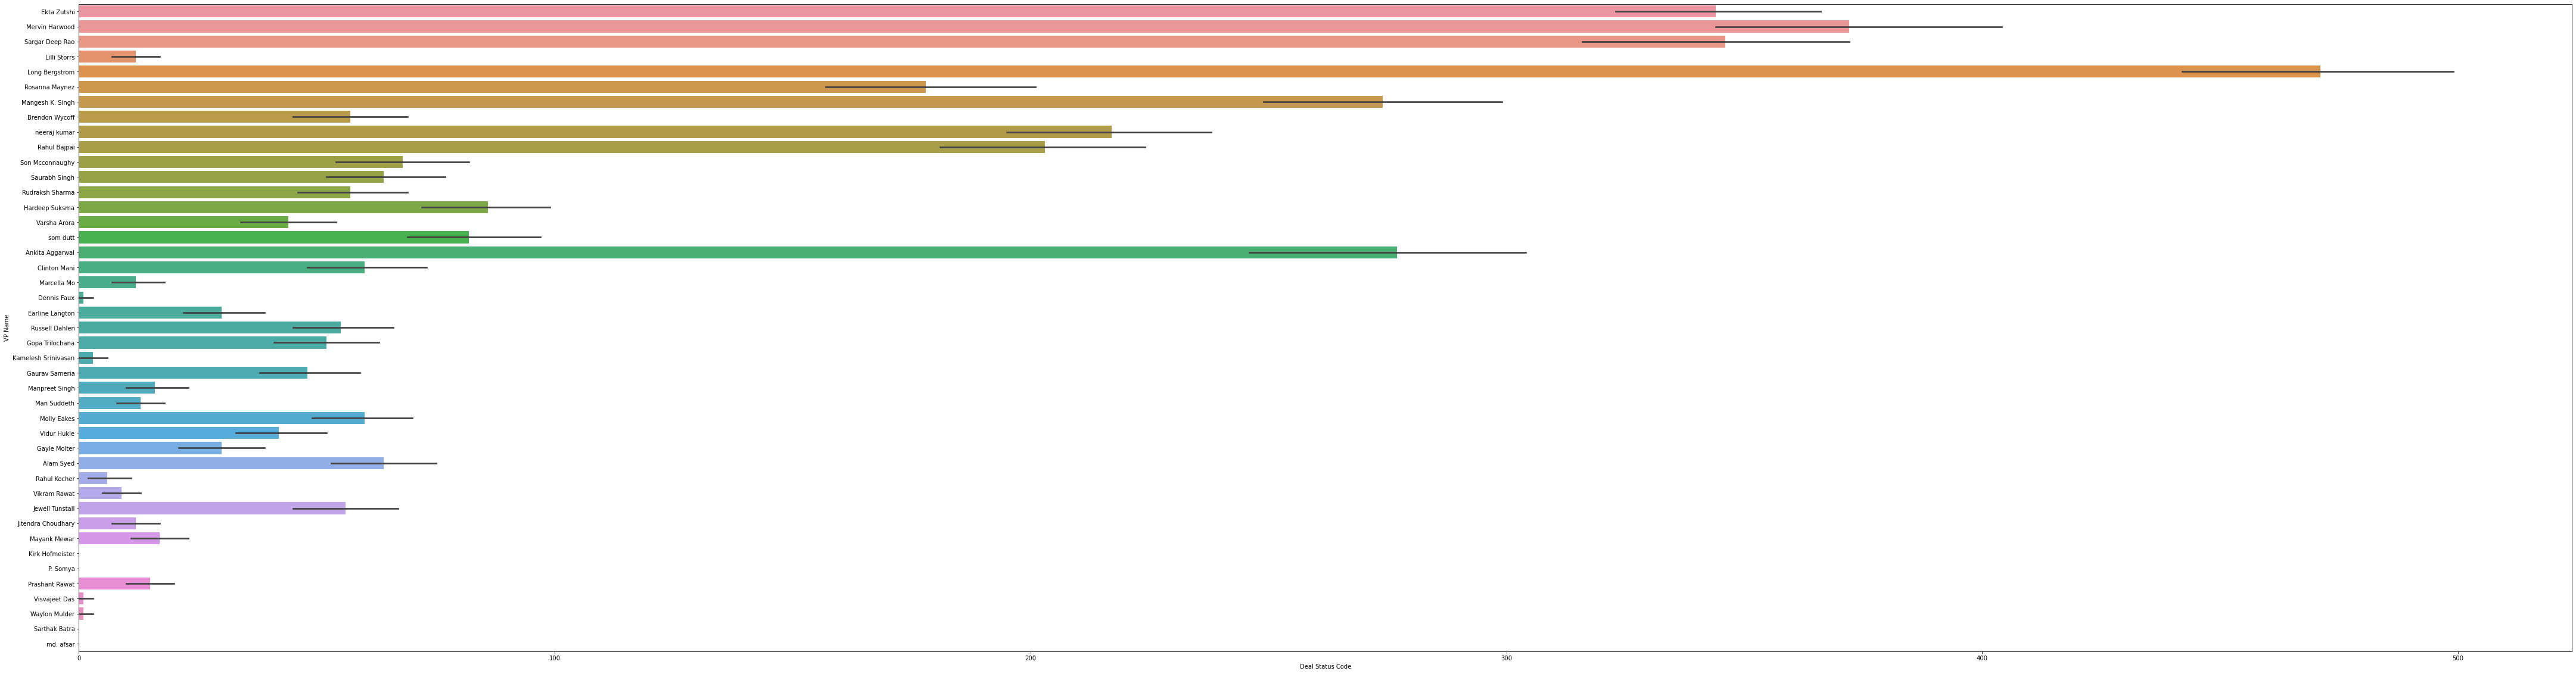

In [18]:
plt.subplots(figsize=(75,20))
plt.yticks(rotation=0)
sns.barplot(x = 'Deal Status Code', y = 'VP Name', data = dataset, estimator = np.sum, orient = 'h')

From this plot we found that some of the VP's like Long Bergstorm, Ekta Zutshi, Mervin Harwood, Rosanna Maynez, Sargar Deep Rao, Neeraj Kumar, Rahul Bajpai, Clinton Mani are having much higher number of winnings than others.

Now lets try to find the relationship between 'Deal Cost' and 'VP Name' keeping hue as 'Deal Status Code' and estimator as mean.

<AxesSubplot:xlabel='Deal Cost', ylabel='VP Name'>

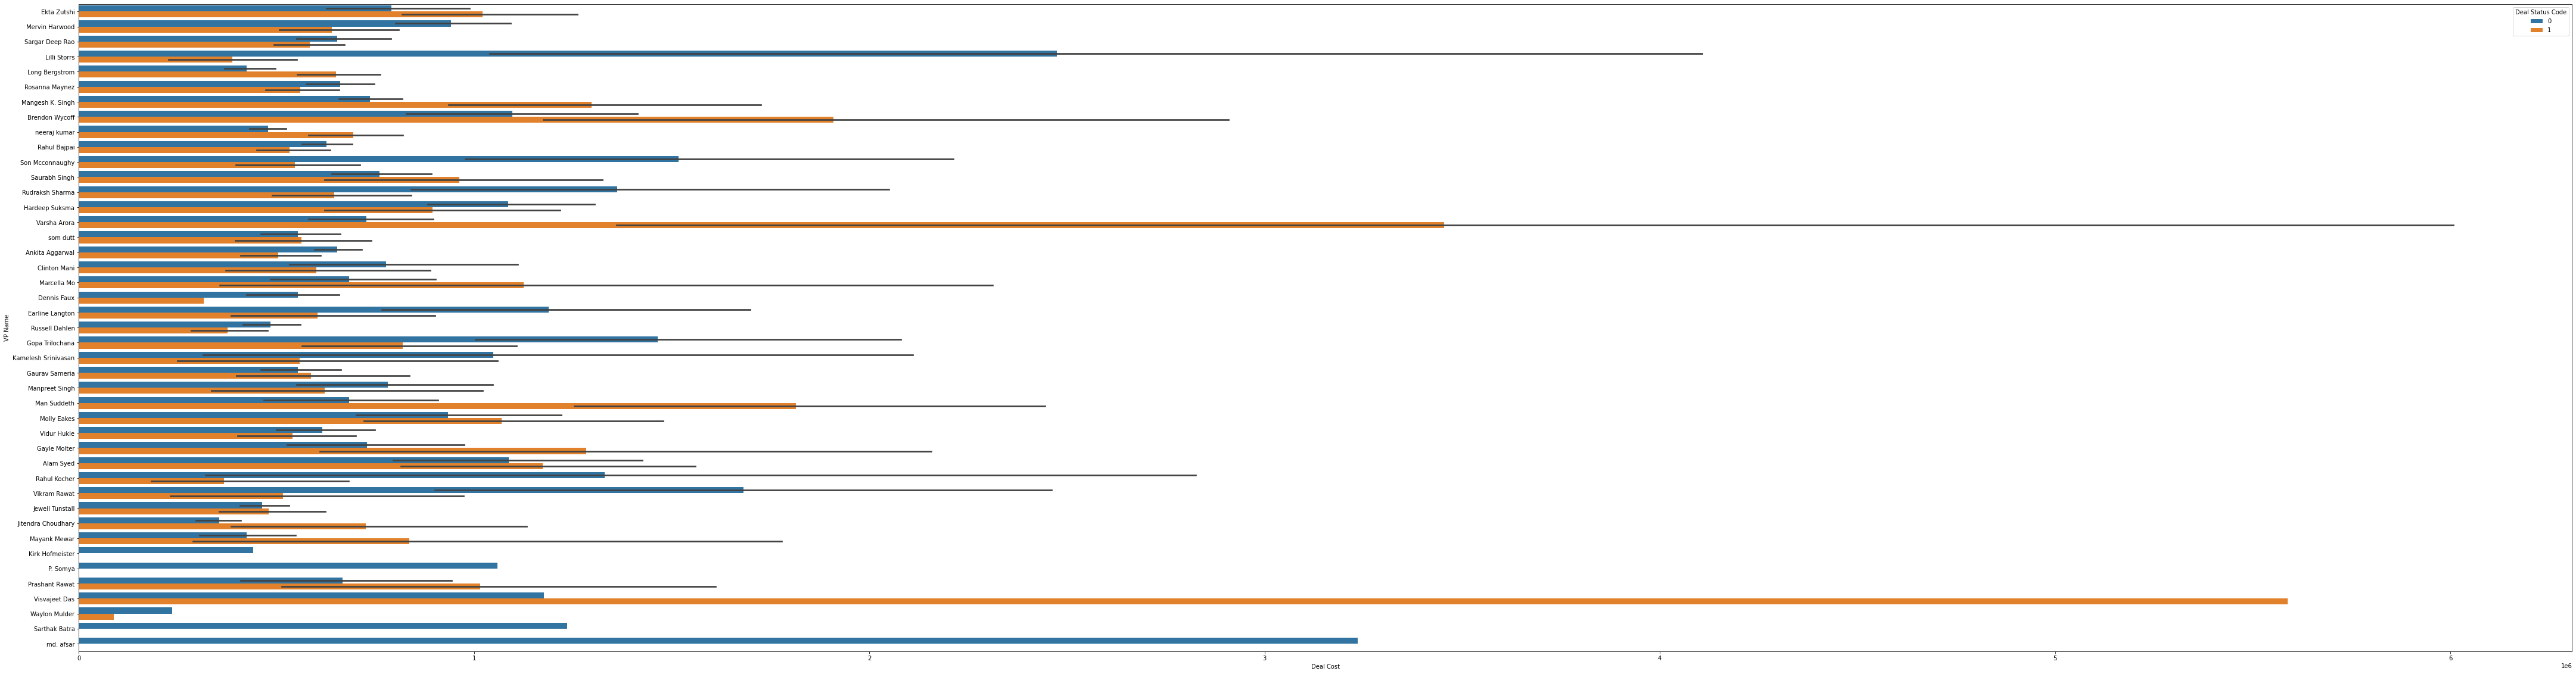

In [19]:
plt.subplots(figsize=(75,20))
sns.barplot(x = 'Deal Cost', y = 'VP Name', hue = 'Deal Status Code', data = dataset, estimator = np.mean, orient = 'h')

From this we found that Viswajeet Das and som dutt have won big budget bids.

One interesting thing can be seen as even though Viswajeet Das have won big budget bid but his number of wins are very less as found in previos plot. So he must be fresher but very talented to handle such big deals.

Also VP's like Mervin Harwood and Ekta Zutshi have dealt with low budget bids. So they must be very experienced in handling low budget bids as they are having higher number of wins.

<AxesSubplot:xlabel='Deal Cost', ylabel='VP Name'>

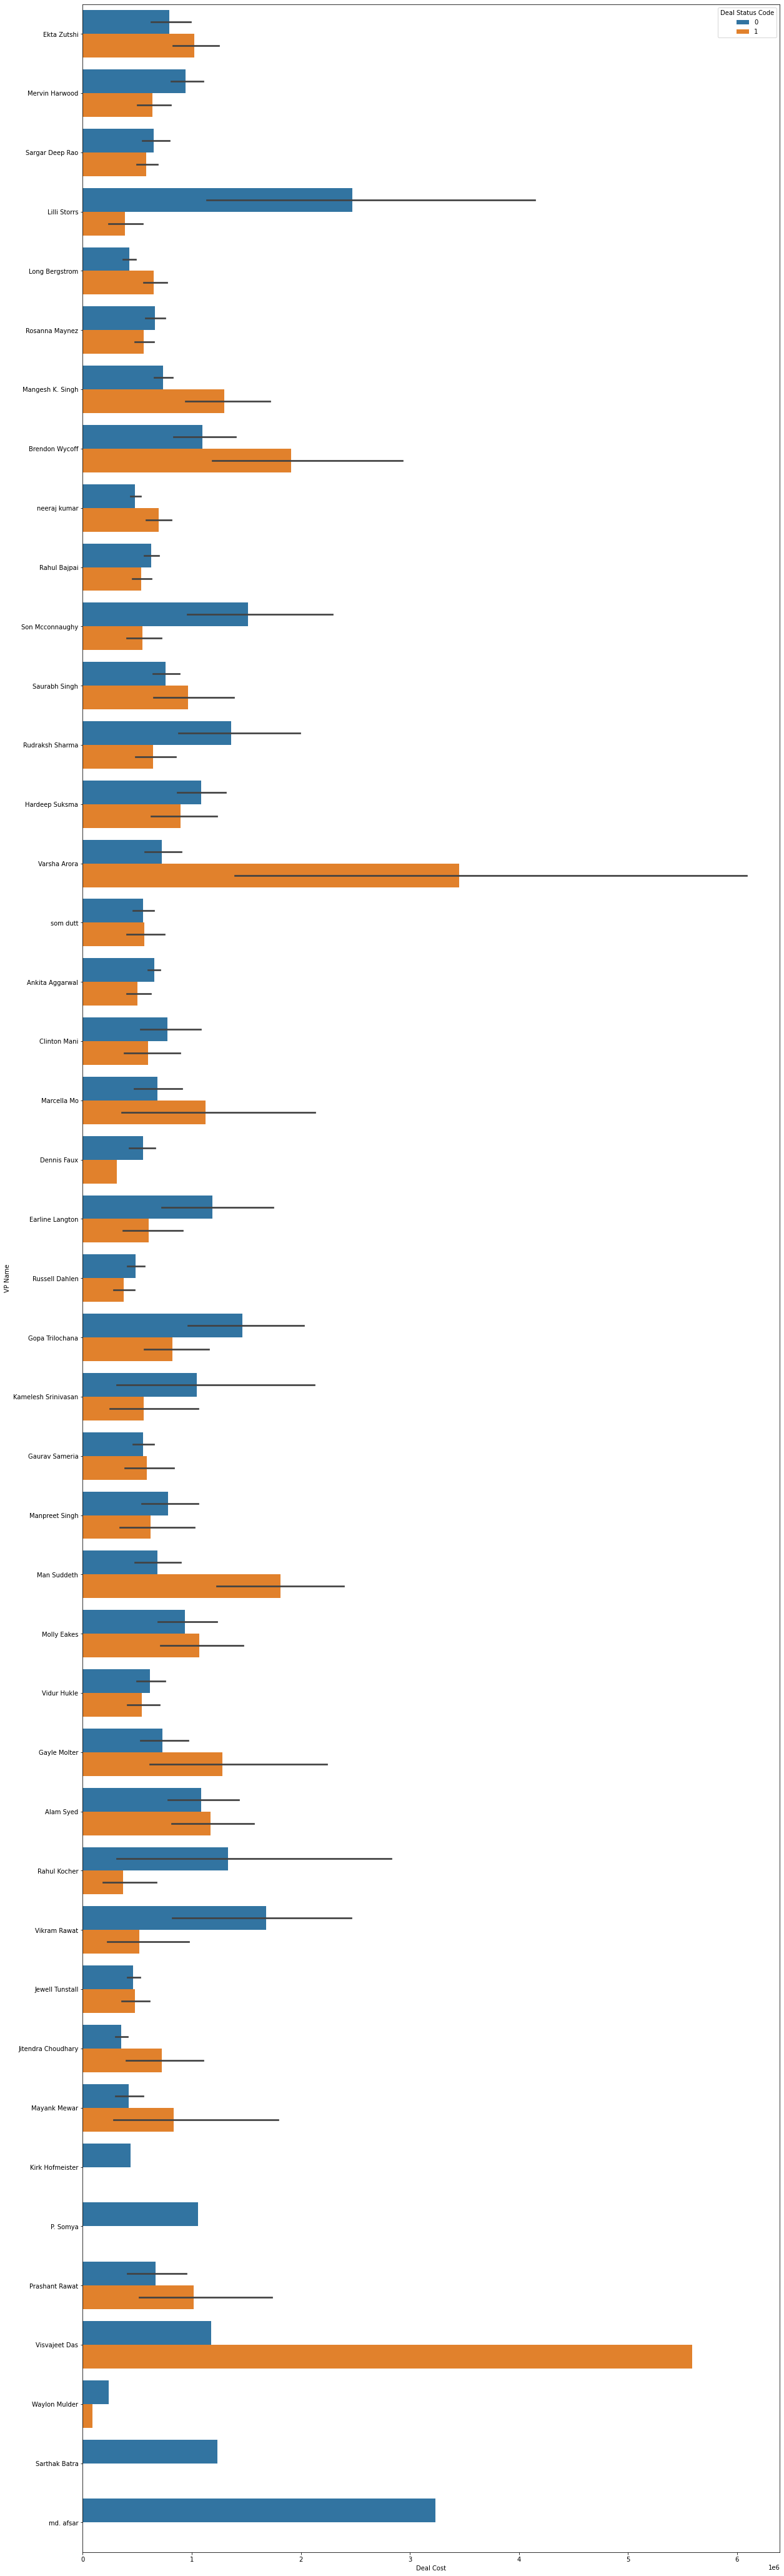

In [20]:
plt.subplots(figsize=(20,75))
sns.barplot(y = 'VP Name', x = 'Deal Cost', hue = 'Deal Status Code', data = dataset, estimator = np.mean, orient = 'h')

Now lets try to find the relationship between 'Client Category' and 'Deal Status Code' keeping estimator as sum.

<AxesSubplot:xlabel='Client Category', ylabel='Deal Status Code'>

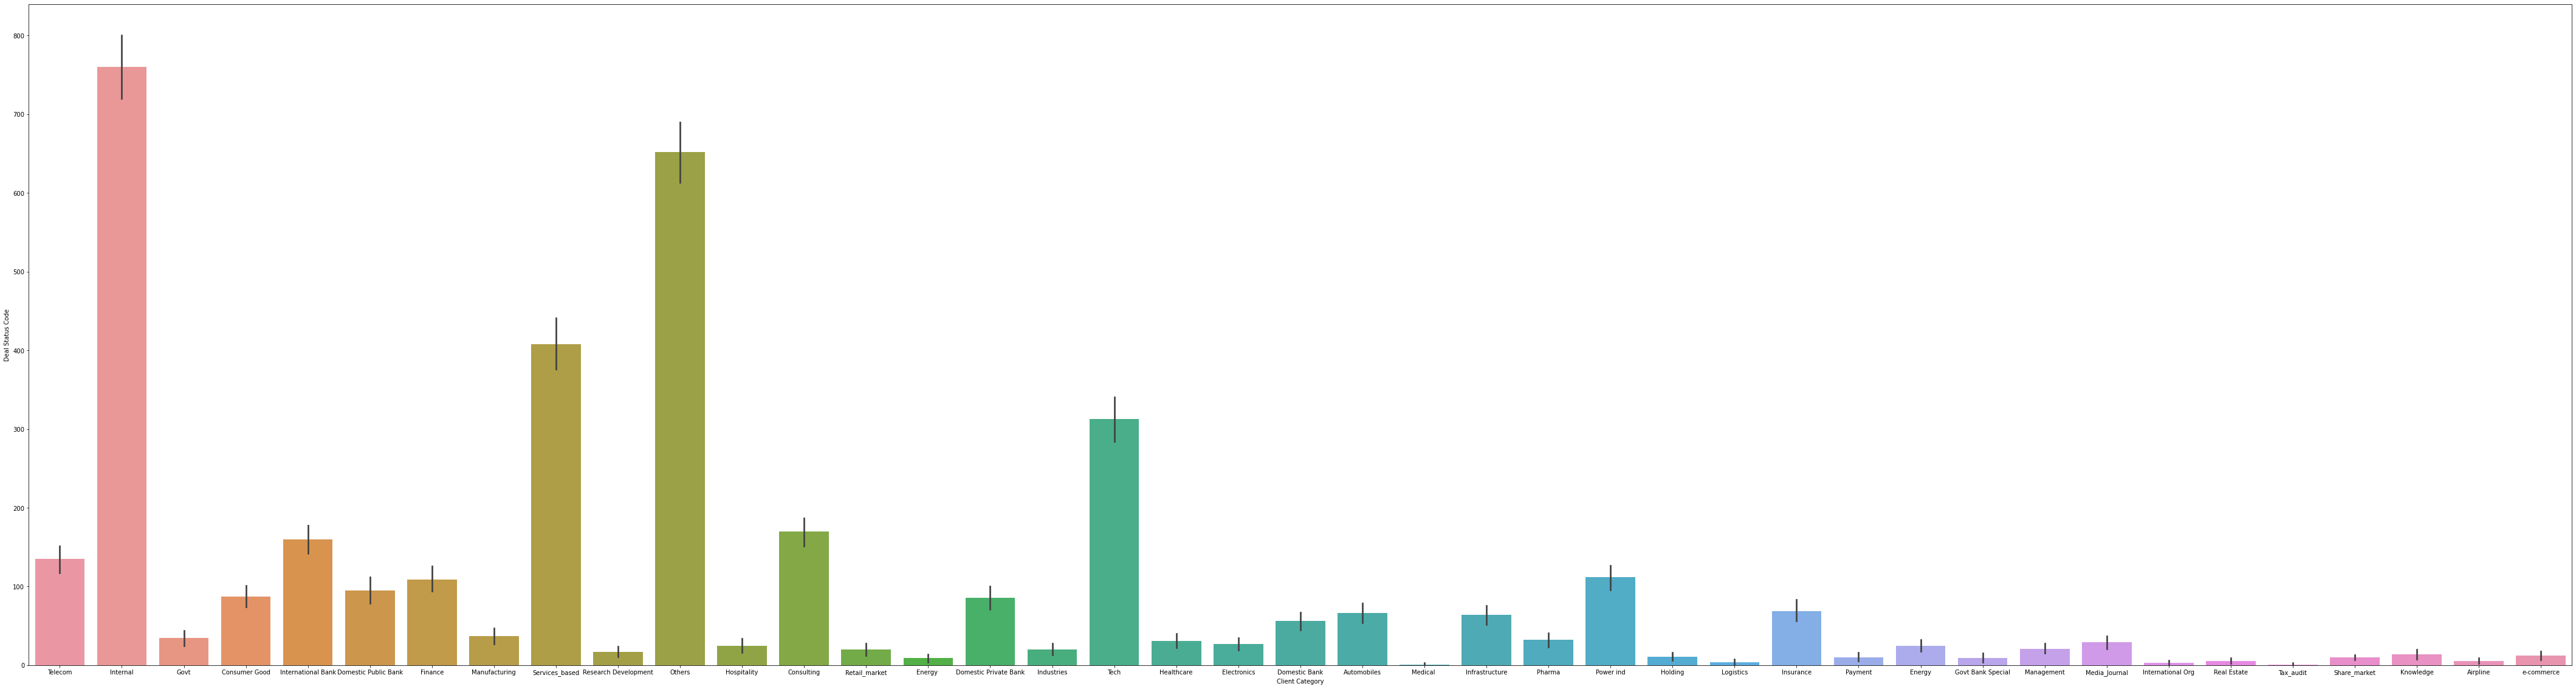

In [21]:
plt.subplots(figsize=(75,20))
sns.barplot(x = 'Client Category', y = 'Deal Status Code', data = dataset, estimator = np.sum)

We can see that sectors like Internal, Service based, Others and Tech are having maximum number of wins.

Now lets try to find the relationship between 'Client Category' and 'Deal Cost' keeping hue as 'Deal Status Code' and estimator as mean.

<AxesSubplot:xlabel='Client Category', ylabel='Deal Cost'>

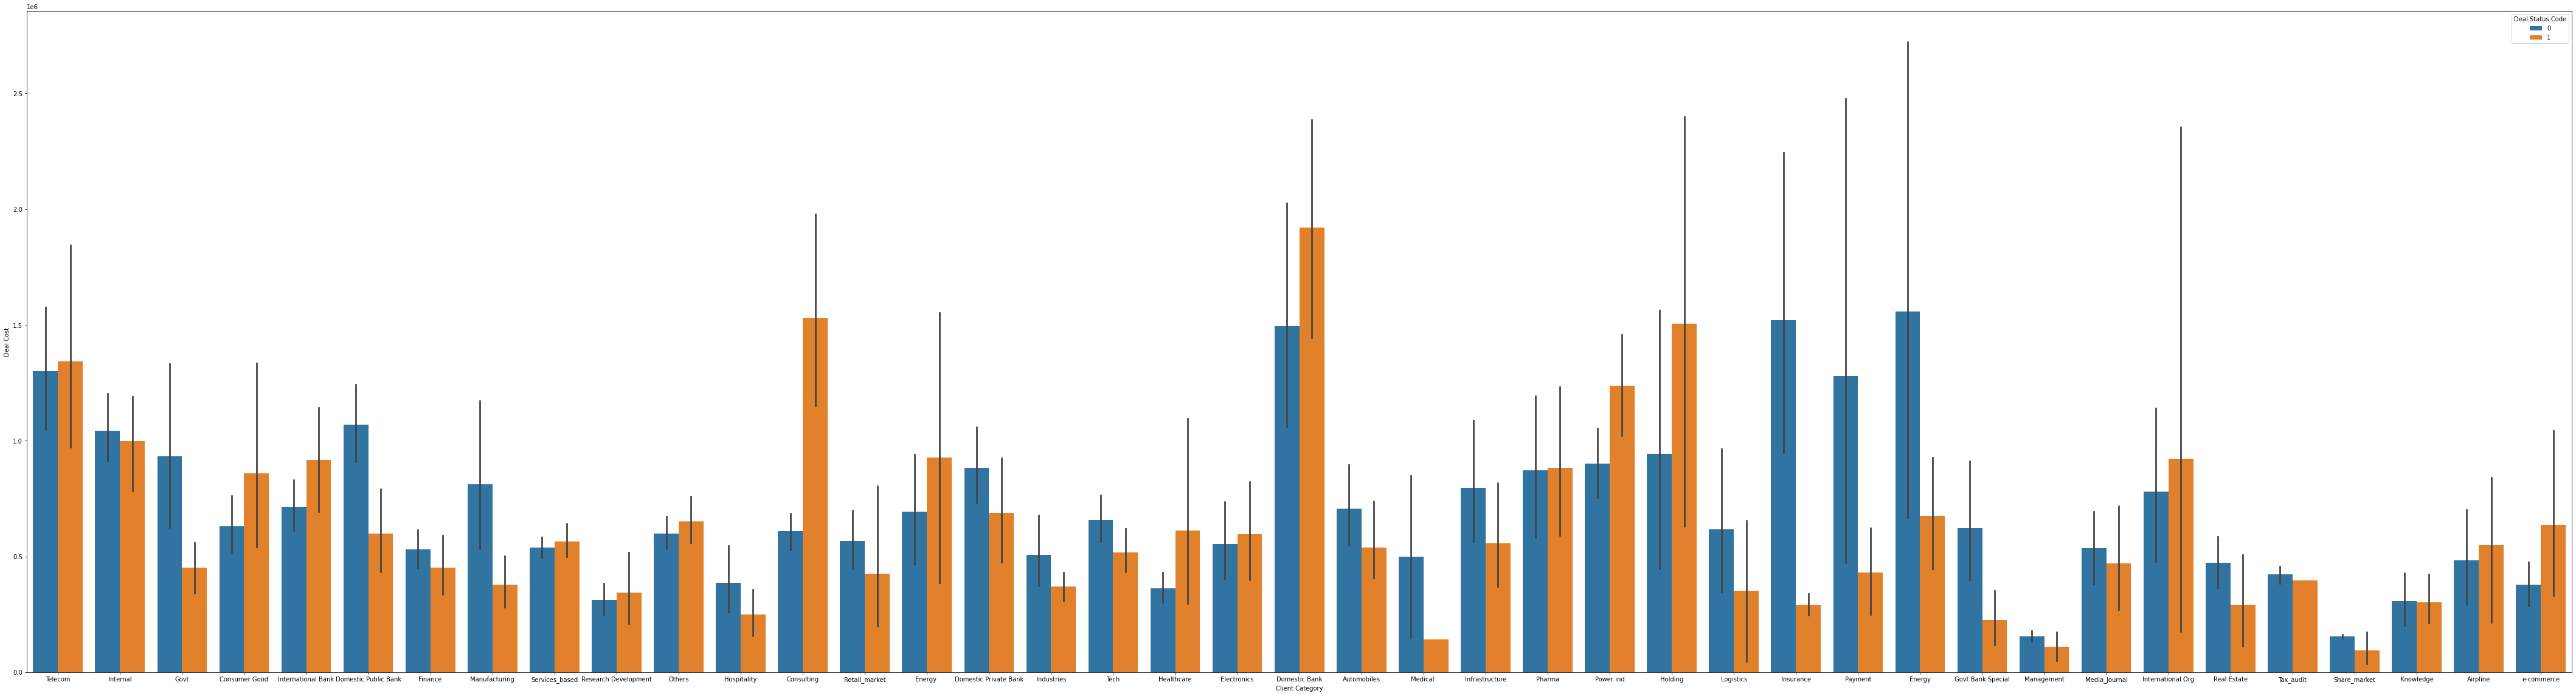

In [22]:
plt.subplots(figsize=(75,20))
sns.barplot(x = 'Client Category', y = 'Deal Cost', hue = 'Deal Status Code', data = dataset, estimator = np.mean)

From this we find that big buget wins are in Telecom, Consulting, Domestic Bank, Power ind and Holding sectors

Now creating a new dataset as df with required columns

In [23]:
columns = ['Client Category', 'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code']
df = dataset[columns]
df.sample()

,Client Category,VP Name,Manager Name,Deal Cost,Deal Status Code
2304,Healthcare,Sargar Deep Rao,Akshansh Chaudhary,235294.12,1


As we want to find out the combination of VP and Manager with higher number of wins, we will use groupby function and store the data in df1.

So grouping 'VP Name' and 'Manager Name' and accumulating them with sum of 'Deal Status Code'

In [24]:
df1 = df.groupby(['VP Name']+['Manager Name'])['Deal Status Code'].sum()
df1.head()

VP Name    Manager Name          
Alam Syed  Abhinav Warrier            0
           Alam Syed                  2
           Darin Vath                17
           Deepak Chandra Prakash     6
           Dennis Faux                1
Name: Deal Status Code, dtype: int32

After grouping we can see that each VP is combined with respective Manager based on the sum of number of wins.

So reseting index by name as 'Deal Status Code_sum' and sorting values in decesnding order.

In [25]:
df1 = df1.reset_index(name='Deal Status Code_sum')
df1 = df1.sort_values(by = 'Deal Status Code_sum', ascending=False)
df1.head(10)

,VP Name,Manager Name,Deal Status Code_sum
369,Long Bergstrom,Russell Dahlen,75
597,Rahul Bajpai,Rudraksh Sharma,72
904,neeraj kumar,Molly Eakes,62
38,Ankita Aggarwal,Desmond Krout,53
914,neeraj kumar,Vinay Kumar,51
348,Long Bergstrom,Jewell Tunstall,46
350,Long Bergstrom,Karna Bhuvennant,46
738,Sargar Deep Rao,Manpreet Singh,42
164,Ekta Zutshi,Jean Sappington,40
194,Ekta Zutshi,neeraj kumar,40


This is the list of top 10 successful pair or combination of VP's and Manger's.

Same way successful VP and Manager can be found out with respect to Client Category

In [26]:
columns = ['Client Category', 'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code']
df2 = dataset[columns]
df2.sample()

,Client Category,VP Name,Manager Name,Deal Cost,Deal Status Code
7184,Consumer Good,Rahul Bajpai,Vidur Hukle,382352.94,1


In [27]:
df2 = df2.groupby(['Client Category']+['VP Name']+['Manager Name'])['Deal Status Code'].sum()
df2.head()

Client Category  VP Name          Manager Name     
Airpline         Ankita Aggarwal  Desmond Krout        0
                                  Manish Saundriyal    0
                                  shyam kumar          1
                 Brendon Wycoff   Chloe Beiler         0
                                  Rajneesh Tanwar      0
Name: Deal Status Code, dtype: int32

In [28]:
df2 = df2.reset_index(name='Deal Status Code_sum')
df2 = df2.sort_values(by = ['Deal Status Code_sum','Client Category'], ascending=[False, False])
df2.head(10)

,Client Category,VP Name,Manager Name,Deal Status Code_sum
1738,Others,Long Bergstrom,Karna Bhuvennant,31
106,Consulting,Ekta Zutshi,neeraj kumar,30
1000,Internal,Ankita Aggarwal,Desmond Krout,29
2728,Tech,Rahul Bajpai,Rudraksh Sharma,28
2880,Telecom,Rahul Bajpai,Abhiskek Kumar,27
1655,Others,Ekta Zutshi,Gayle Molter,26
2376,Services_based,Long Bergstrom,Russell Dahlen,24
1020,Internal,Ankita Aggarwal,rohit,24
2374,Services_based,Long Bergstrom,Rayford Durgan,23
1373,International Bank,Long Bergstrom,Russell Dahlen,23


So this is the list of top 10 pair of VPs and Managers with respect to Client Category

Also the particular category of Client can be listed as follows,

In [29]:
df2 = df2.set_index('Client Category')

In [30]:
first = df2.loc['Others']
second = df2.loc['Consulting']

print(first, "\n\n\n", second)

                         VP Name       Manager Name  Deal Status Code_sum
Client Category                                                          
Others            Long Bergstrom   Karna Bhuvennant                    31
Others               Ekta Zutshi       Gayle Molter                    26
Others            Long Bergstrom    Jewell Tunstall                    17
Others              Rahul Bajpai    Rudraksh Sharma                    16
Others           Sargar Deep Rao       Tanuj Bindra                    15
...                          ...                ...                   ...
Others                  som dutt    Jean Sappington                     0
Others                  som dutt    Jewell Tunstall                     0
Others                  som dutt  Manish Saundriyal                     0
Others                  som dutt     Russell Dahlen                     0
Others                  som dutt       mohd khairul                     0

[397 rows x 3 columns] 


           

Same way successful VP and Manager can be found out with respect to Client Category and Deal Cost

In [31]:
columns = ['Client Category', 'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code']
df3 = dataset[columns]
df3.sample()

,Client Category,VP Name,Manager Name,Deal Cost,Deal Status Code
5287,Services_based,Brendon Wycoff,Mannan Upadhiya,302941.18,0


In [32]:
df3 = df3.groupby(['Client Category']+['VP Name']+['Manager Name']+['Deal Cost'])['Deal Status Code'].sum()
df3.head()

Client Category  VP Name          Manager Name       Deal Cost
Airpline         Ankita Aggarwal  Desmond Krout      1470.59      0
                                  Manish Saundriyal  294117.65    0
                                  shyam kumar        77941.18     1
                 Brendon Wycoff   Chloe Beiler       882352.94    0
                                  Rajneesh Tanwar    1470.59      0
Name: Deal Status Code, dtype: int32

In [33]:
df3 = df3.reset_index(name='Deal Status Code_sum')
df3 = df3.sort_values(by = ['Deal Status Code_sum'], ascending=False)
df3.head(10)

,Client Category,VP Name,Manager Name,Deal Cost,Deal Status Code_sum
3221,Management,Russell Dahlen,Martin Cheyne,11764.71,6
3213,Management,Mervin Harwood,Karna Bhuvennant,7352.94,5
3792,Others,Long Bergstrom,Karna Bhuvennant,147058.82,5
6374,Telecom,Rahul Bajpai,Abhiskek Kumar,176470.59,4
68,Automobiles,Mangesh K. Singh,Kamelesh Srinivasan,294117.65,4
3798,Others,Long Bergstrom,Karna Bhuvennant,294117.65,4
2034,Internal,Ankita Aggarwal,rohit,102941.18,4
5981,Tech,Rahul Bajpai,Rudraksh Sharma,198529.41,4
3000,International Bank,Long Bergstrom,Luv Malhotra,352941.18,3
3641,Others,Gayle Molter,Rayford Durgan,441176.47,3


So for a particular VP its associated manager for a particular client can be listed as,

In [34]:
df3 = df3.set_index('VP Name')
fst = df3.loc['Ankita Aggarwal']
snd = df3.loc['Ekta Zutshi']

print(fst, "\n\n\n", snd)

                   Client Category      Manager Name   Deal Cost  \
VP Name                                                            
Ankita Aggarwal           Internal             rohit   102941.18   
Ankita Aggarwal           Internal             rohit    58823.53   
Ankita Aggarwal           Internal     Desmond Krout   529411.77   
Ankita Aggarwal             Others  Florencio Quiros   198529.41   
Ankita Aggarwal             Others    Fredricka Bald   117647.06   
...                            ...               ...         ...   
Ankita Aggarwal  International Org             rohit   588235.29   
Ankita Aggarwal  International Org    Manisha Gulati  1000000.00   
Ankita Aggarwal  International Org       Akul Jindal    73529.41   
Ankita Aggarwal  International Org     Desmond Krout   558823.53   
Ankita Aggarwal  International Org  Florencio Quiros  2941176.47   

                 Deal Status Code_sum  
VP Name                                
Ankita Aggarwal                    

From this we can see that Ankita Aggarwal has won 4 number of bids with Rohit for Ciemt category - Internal having deal cost of 102941.18

Now analyzing Managers associated with Ekta Zutshi

<AxesSubplot:xlabel='Manager Name', ylabel='Deal Status Code_sum'>

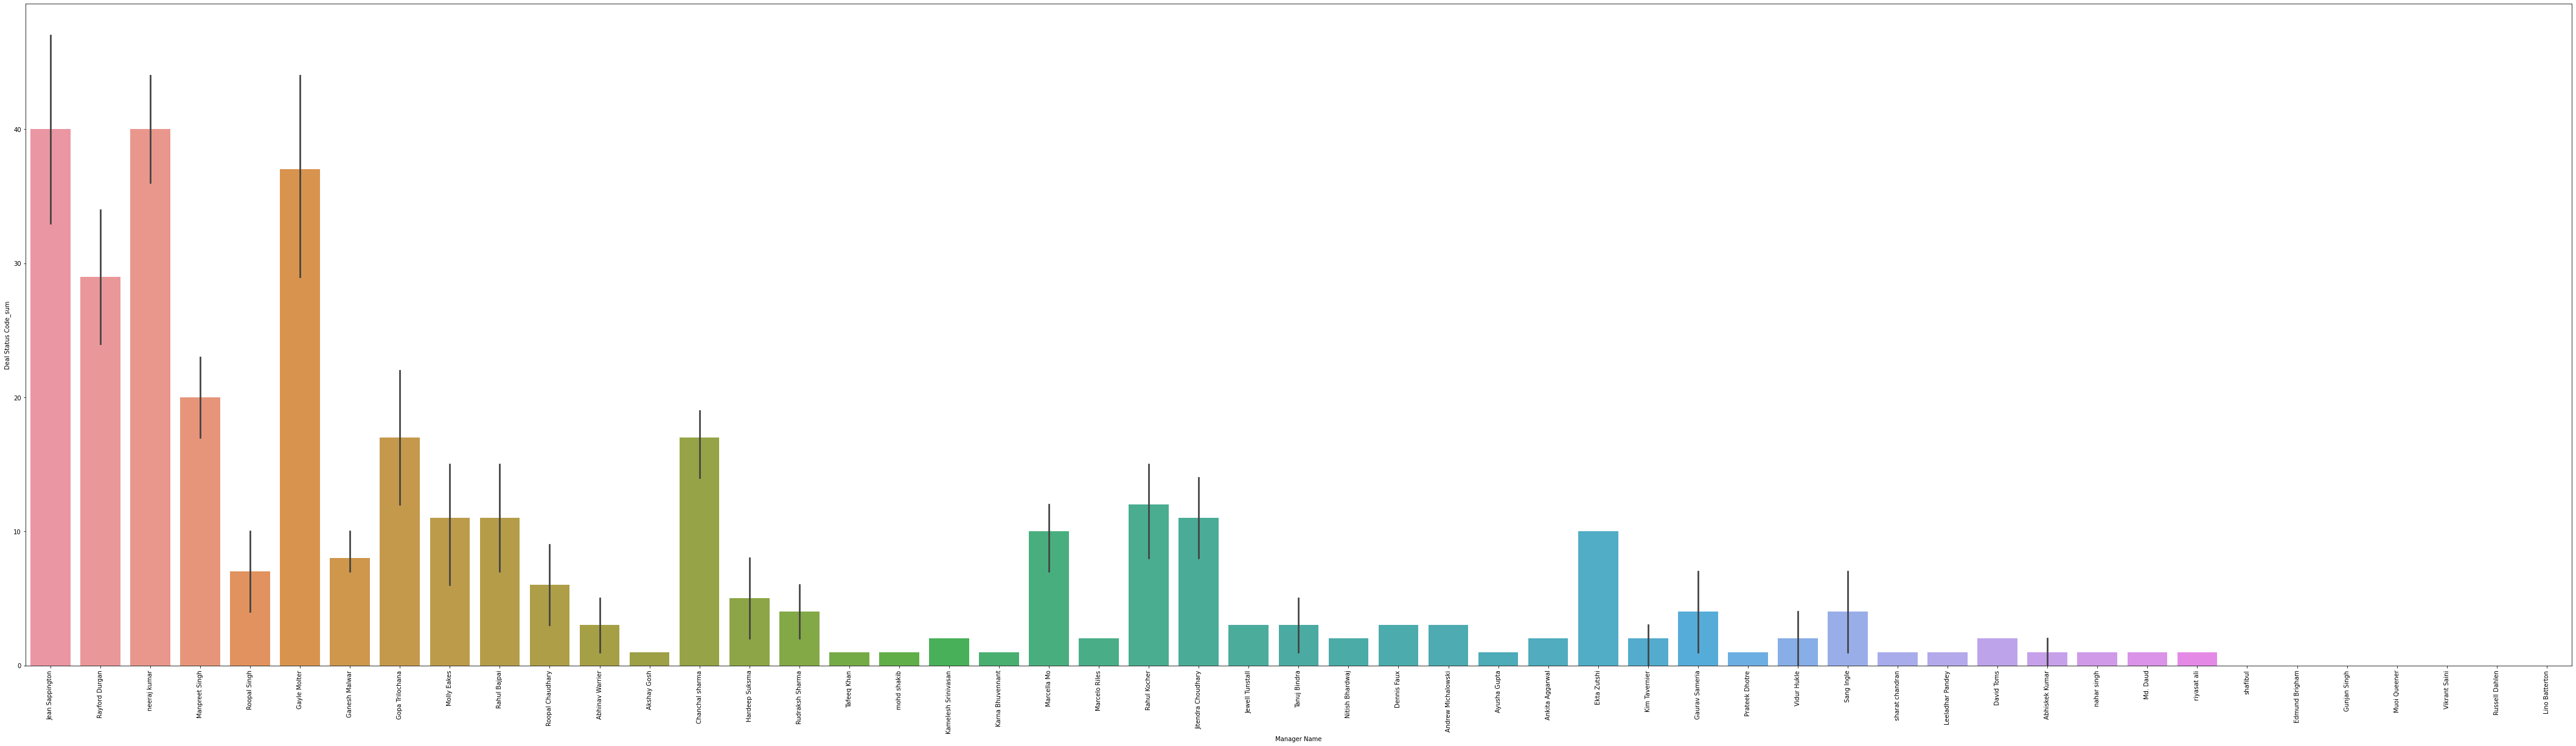

In [35]:
plt.subplots(figsize=(75,20))
plt.xticks(rotation=90)
sns.barplot(x = 'Manager Name', y = 'Deal Status Code_sum', data = snd, estimator = np.sum)

Now for further ease lets store categorical variables in X, output variable in y and numerical variable in z.

In [36]:
cols1 = ['Client Category', 'VP Name', 'Manager Name']
cols2 = ['Deal Status Code']
cols3 = ['Deal Cost']
X = dataset[cols1]
y = dataset[cols2]
z = dataset[cols3]

In [37]:
X.head()

,Client Category,VP Name,Manager Name
0,Telecom,Ekta Zutshi,Gopa Trilochana
1,Telecom,Ekta Zutshi,Gopa Trilochana
2,Internal,Ekta Zutshi,Russell Dahlen
3,Internal,Ekta Zutshi,Russell Dahlen
4,Internal,Ekta Zutshi,Russell Dahlen


In [38]:
y.head()

,Deal Status Code
0,1
1,1
2,0
3,0
4,0


Using One Hot Encoder for categorical features in X and storing them in X1

In [39]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)
X1 = pd.DataFrame(ohe.fit_transform(X[['Client Category', 'VP Name', 'Manager Name']]))
X1.columns = ohe.get_feature_names()
X1.head()

,x0_Automobiles,x0_Consulting,x0_Consumer Good,x0_Domestic Bank,x0_Domestic Private Bank,x0_Domestic Public Bank,x0_Electronics,x0_Energy,x0_Energy,x0_Finance,...,x2_shafibul,x2_sharat chandran,x2_sheak shakir,x2_shiv kumar,x2_shiv shakti singh,x2_shyam kumar,x2_som dutt,x2_sunder paal,x2_vansu dev,x2_vinit katariya
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that after using One HOt Encoder our number of features has increased from 9 to 359.

Now combining encoded featues and numeric feature i.e. X1 and z as X2

In [40]:
X2 = pd.concat((X1,z), axis=1)

In [41]:
X2.head()

,x0_Automobiles,x0_Consulting,x0_Consumer Good,x0_Domestic Bank,x0_Domestic Private Bank,x0_Domestic Public Bank,x0_Electronics,x0_Energy,x0_Energy,x0_Finance,...,x2_sharat chandran,x2_sheak shakir,x2_shiv kumar,x2_shiv shakti singh,x2_shyam kumar,x2_som dutt,x2_sunder paal,x2_vansu dev,x2_vinit katariya,Deal Cost
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150000.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,744705.88
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60000.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80882.35


As we combined 1 feature our number of features became 360 from 359.

Now splitting our data into train and test in order to process into a machine learning model. 

In [42]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y_train, y_test = train_test_split(X2,y, test_size=0.3,random_state=1)

X2_train.shape, X2_test.shape

((7042, 360), (3019, 360))

Our data got split into 7042 rows for train and 3019 as test as we kept our test size as 30%.

In [43]:
X2_train.head()

,x0_Automobiles,x0_Consulting,x0_Consumer Good,x0_Domestic Bank,x0_Domestic Private Bank,x0_Domestic Public Bank,x0_Electronics,x0_Energy,x0_Energy,x0_Finance,...,x2_sharat chandran,x2_sheak shakir,x2_shiv kumar,x2_shiv shakti singh,x2_shyam kumar,x2_som dutt,x2_sunder paal,x2_vansu dev,x2_vinit katariya,Deal Cost
217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
9619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600000.00
5142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,398529.41
8189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1176470.59
248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132352.94


Also Scaling our both train and test data using Standard Scaler

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X2_train_scaled = pd.DataFrame(scaler.fit_transform(X2_train), columns=X2_train.columns)
X2_test_scaled = pd.DataFrame(scaler.fit_transform(X2_test), columns=X2_test.columns)

Scaled data is stored in X2_train_scaled and X2_test_scaled respectively.

In [46]:
X2_train_scaled.head()

,x0_Automobiles,x0_Consulting,x0_Consumer Good,x0_Domestic Bank,x0_Domestic Private Bank,x0_Domestic Public Bank,x0_Electronics,x0_Energy,x0_Energy,x0_Finance,...,x2_sharat chandran,x2_sheak shakir,x2_shiv kumar,x2_shiv shakti singh,x2_shyam kumar,x2_som dutt,x2_sunder paal,x2_vansu dev,x2_vinit katariya,Deal Cost
0,-0.129416,-0.190657,-0.136063,-0.11694,-0.165618,-0.209101,-0.090335,-0.07746,-0.059689,-0.187840,...,-0.020645,-0.043006,-0.020645,-0.011917,-0.073658,-0.016855,-0.029202,-0.115054,-0.035773,-0.464383
1,-0.129416,-0.190657,-0.136063,-0.11694,-0.165618,-0.209101,-0.090335,-0.07746,-0.059689,5.323689,...,-0.020645,-0.043006,-0.020645,-0.011917,-0.073658,-0.016855,-0.029202,-0.115054,-0.035773,-0.100714
2,-0.129416,-0.190657,-0.136063,-0.11694,-0.165618,-0.209101,-0.090335,-0.07746,-0.059689,-0.187840,...,-0.020645,-0.043006,-0.020645,-0.011917,-0.073658,-0.016855,-0.029202,-0.115054,-0.035773,-0.222829
3,7.727024,-0.190657,-0.136063,-0.11694,-0.165618,-0.209101,-0.090335,-0.07746,-0.059689,-0.187840,...,-0.020645,-0.043006,-0.020645,-0.011917,-0.073658,-0.016855,-0.029202,-0.115054,-0.035773,0.248693
4,-0.129416,-0.190657,-0.136063,-0.11694,6.038000,-0.209101,-0.090335,-0.07746,-0.059689,-0.187840,...,-0.020645,-0.043006,-0.020645,-0.011917,-0.073658,-0.016855,-0.029202,-0.115054,-0.035773,-0.384162


As our data is having too many features, it may give us a problem of overfitting so it is better to use PCA, LDA for dimensionality reduction.

First using PCA on scaled data keeping number of components 20 and storing them in new variables.

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
X2_train_scaled_pca=pca.fit_transform(X2_train_scaled)
X2_test_scaled_pca=pca.fit_transform(X2_test_scaled)


In [48]:
X2_train_scaled_pca.shape

(7042, 20)

We can see that our total number of features got reduced to 20 from 360.

Now lets build our model based on this PCA

Logistic Regression on PCA

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X2_train_scaled_pca, y_train)

y_pred_train_pca_lg = model.predict(X2_train_scaled_pca)
y_pred_test_pca_lg = model.predict(X2_test_scaled_pca)



In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
print(confusion_matrix(y_train,y_pred_train_pca_lg))
print(accuracy_score(y_train,y_pred_train_pca_lg))

print(confusion_matrix(y_test,y_pred_test_pca_lg))
print(accuracy_score(y_test,y_pred_test_pca_lg))

[[4036  357]
 [2173  476]]
0.6407270661743822
[[1766  147]
 [ 996  110]]
0.6213978138456443


We find that, Accuracy of Train data is 63.80% and Accuracy of Test data is 60.81%

# Building a DecisionTree Classifier model on PCA

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X2_train_scaled_pca, y_train)

y_pred_train_pca_dt = dtree.predict(X2_train_scaled_pca)
y_pred_test_pca_dt = dtree.predict(X2_test_scaled_pca)

print(confusion_matrix(y_train,y_pred_train_pca_dt))
print(accuracy_score(y_train,y_pred_train_pca_dt))

print(confusion_matrix(y_test,y_pred_test_pca_dt))
print(accuracy_score(y_test,y_pred_test_pca_dt))

[[4386    7]
 [  53 2596]]
0.9914796932689577
[[1016  897]
 [ 597  509]]
0.5051341503809208


We find that, Accuracy of Train data is 99.15% and Accuracy of Test data is 48.66% which is a problem of overfitting.

# RandomForest on PCA model

In [53]:
from sklearn.ensemble import RandomForestClassifier # RandomForestRegressor
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X2_train_scaled_pca, y_train)

y_pred_train_pca_rf = rf.predict(X2_train_scaled_pca)
y_pred_test_pca_rf = rf.predict(X2_test_scaled_pca)

print(accuracy_score(y_train, y_pred_train_pca_rf))
print(accuracy_score(y_test, y_pred_test_pca_rf))

0.9914796932689577
0.5743623716462405


We find that, Accuracy of Train data is 99.15% and Accuracy of Test data is 59.52%. Accuray of test data is more from decision tree but still it is which is a problem of overfitting.

# Now applying LDA over the dataset

In [54]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=None)
X2_train_scaled_lda = lda.fit_transform(X2_train_scaled, y_train)
X2_test_scaled_lda = lda.fit_transform(X2_test_scaled, y_test )

# Decision Tree on PCA model

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X2_train_scaled_lda, y_train)

y_pred_train_lda_dt = dt.predict(X2_train_scaled_lda)
y_pred_test_lda_dt = dt.predict(X2_test_scaled_lda)

print(confusion_matrix(y_train,y_pred_train_lda_dt))
print(accuracy_score(y_train,y_pred_train_lda_dt))

print(confusion_matrix(y_test,y_pred_test_lda_dt))
print(accuracy_score(y_test,y_pred_test_lda_dt))

[[4386    7]
 [  53 2596]]
0.9914796932689577
[[1211  702]
 [ 471  635]]
0.6114607485922491


We find that, Accuracy of Train data is 99.15% and Accuracy of Test data is 61.15%. Accuray of test data is better from decision tree on PCA but still it is a problem of overfitting.

# RandomForest on LDA Model

In [56]:
from sklearn.ensemble import RandomForestClassifier # RandomForestRegressor
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X2_train_scaled_lda, y_train)

y_pred_train_lda_rf = rf.predict(X2_train_scaled_lda)
y_pred_test_lda_rf = rf.predict(X2_test_scaled_lda)

print(accuracy_score(y_train, y_pred_train_lda_rf))
print(accuracy_score(y_test, y_pred_test_lda_rf))

0.9913376881567736
0.6107982775753561


We find that, Accuracy of Train data is 99.13% and Accuracy of Test data is 61.11%. Accuray of test data is better from ranodm forest tree on PCA but still it is a problem of overfitting.

In [57]:
from sklearn.svm import SVC

In [58]:
# Kernel - linear / sigmoid / polynomial / rbf
# Kernel - linear 
svc_rbf = SVC(C=1.0,kernel='rbf')
svc_rbf.fit(X2_train_scaled, y_train)

svc_rbf_pred_train = svc_rbf.predict(X2_train_scaled)
svc_rbf_pred_test = svc_rbf.predict(X2_test_scaled)

print(accuracy_score(y_train,svc_rbf_pred_train))
print(accuracy_score(y_test,svc_rbf_pred_test))

0.7262141437091735
0.699238158330573


Now as Random forest is giving better results as compared to logistic regression, decision tree and SVM, let us find Random Forest on our scaled data i.e. without PCA or LDA.

# RandomForest on Scaled Data

In [59]:
from sklearn.ensemble import RandomForestClassifier # RandomForestRegressor
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X2_train_scaled, y_train)

y_pred_train_rf = rf.predict(X2_train_scaled)
y_pred_test_rf = rf.predict(X2_test_scaled)

print(accuracy_score(y_train, y_pred_train_rf))
print(accuracy_score(y_test, y_pred_test_rf))

0.9914796932689577
0.7502484266313348


Accuracy of normal scaled  data is better than the PCA or LDA model, so going for cross validation to find the best accuracy.



# Cross validation


On Random forest for LDA model

In [60]:
from sklearn.model_selection import cross_val_score
accuracy_rf = cross_val_score(estimator=rf, X=X2_train_scaled_lda, y=y_train, cv=5)
accuracy1_rf = cross_val_score(estimator=rf, X=X2_test_scaled_lda, y=y_test, cv=5)
print(accuracy_rf)
print(accuracy1_rf)

[0.72888573 0.71753016 0.72017045 0.75497159 0.74360795]
[0.71357616 0.66887417 0.67715232 0.68211921 0.69485904]


On Random forest for normal scaled data

In [61]:
from sklearn.model_selection import cross_val_score
accuracy_rf = cross_val_score(estimator=rf, X=X2_train_scaled, y=y_train, cv=5)
accuracy1_rf = cross_val_score(estimator=rf, X=X2_test_scaled, y=y_test, cv=5)
print(accuracy_rf)
print(accuracy1_rf)

[0.75798439 0.77217885 0.77485795 0.78622159 0.77414773]
[0.70695364 0.73344371 0.7102649  0.6986755  0.68656716]


By comapring the accuracies, we can say that our best model is random forest on normal scaled data

In [62]:
# classification_report
print(classification_report(y_train,y_pred_train_lda_rf))
print(classification_report(y_test,y_pred_test_lda_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4393
           1       0.99      0.98      0.99      2649

    accuracy                           0.99      7042
   macro avg       0.99      0.99      0.99      7042
weighted avg       0.99      0.99      0.99      7042

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      1913
           1       0.47      0.57      0.52      1106

    accuracy                           0.61      3019
   macro avg       0.60      0.60      0.60      3019
weighted avg       0.63      0.61      0.62      3019



In [63]:
# classification_report
print(classification_report(y_train,y_pred_train_rf))
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4393
           1       0.99      0.98      0.99      2649

    accuracy                           0.99      7042
   macro avg       0.99      0.99      0.99      7042
weighted avg       0.99      0.99      0.99      7042

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1913
           1       0.70      0.57      0.62      1106

    accuracy                           0.75      3019
   macro avg       0.73      0.71      0.72      3019
weighted avg       0.74      0.75      0.74      3019

